In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import airbnb_dataset as ad
from fbprophet import Prophet

AD = ad.AirbnbDataset()
city = 'Shanghai'
df, dfo = AD.get_reviews_for_city(city, per_month = True, per_week = False)
df = df.reset_index(drop = False)
df['index'] = df.index
df['date'] =dfo
r = df[df.year == 2020].index.tolist()[0] 
train = df[:r]
train


# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# fig1 = m.plot(forecast)
# fig2 = m.plot_components(forecast)

# data
# dfo
# r = df[df.year == 2020].index.tolist()[0] 
# x1 = df[:r]
# print(x1.shape)
# x2 = df[r:]
# print(x2.shape)
# x1.plot(figsize=(30,15))

City Shanghai is in country China


,year,month,size,index,date
0,2010,9,1,0,2010-09-26
1,2011,3,1,1,2011-03-03
2,2011,7,4,2,2011-07-02
3,2011,8,1,3,2011-07-20
4,2011,9,3,4,2011-07-30
...,...,...,...,...,...
99,2019,8,14403,99,2017-02-25
100,2019,9,12823,100,2017-03-04
101,2019,10,15239,101,2017-03-10
102,2019,11,14512,102,2017-03-17


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


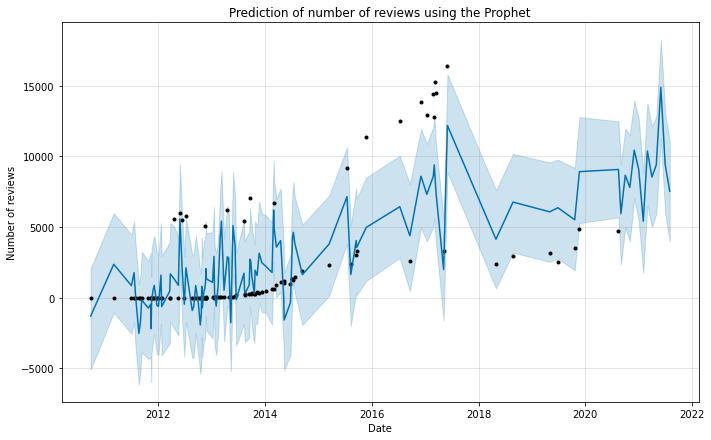

In [31]:
train = train[["date","size"]]
train = train.rename(columns = {"date":"ds","size":"y"})
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
# future.tail()
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of number of reviews using the Prophet")
plt.xlabel("Date")
plt.ylabel("Number of reviews")
plt.show()


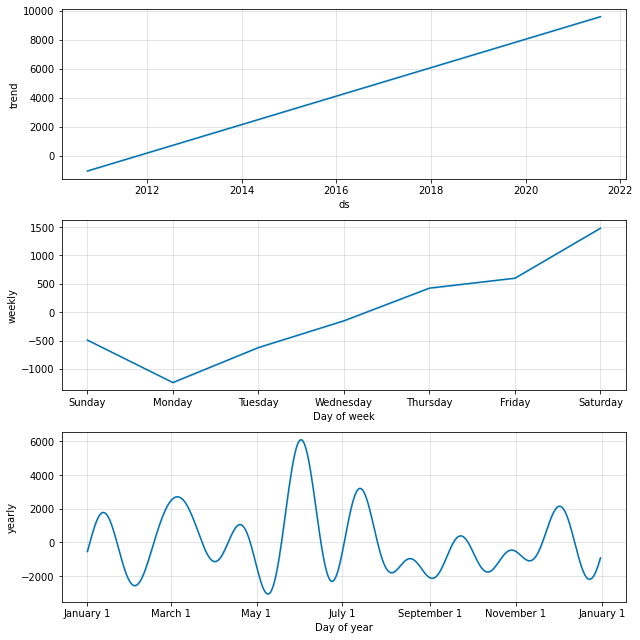

In [32]:
m.plot_components(prediction)
plt.show()

City Shanghai is in country China
(413, 5)
(43, 5)


Text(0, 0.5, 'Number of reviews')

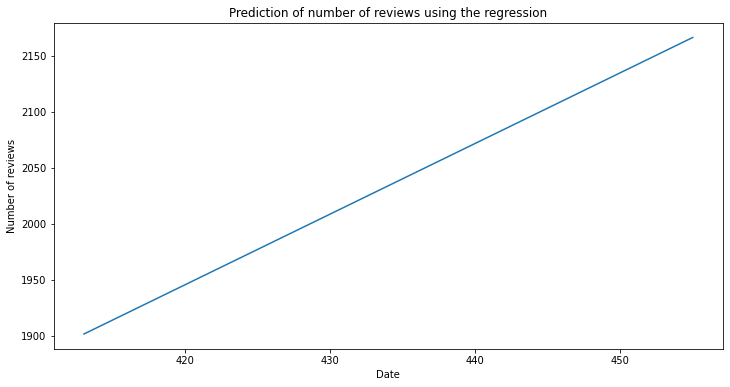

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import airbnb_dataset as ad
from fbprophet import Prophet
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from fbprophet import Prophet


AD = ad.AirbnbDataset()
city = 'Shanghai'
df, dfo = AD.get_reviews_for_city(city, per_month = False, per_week = True)
df = df.reset_index(drop = False)
df['index'] = df.index
df['date'] =dfo
r = df[df.year == 2020].index.tolist()[0] 
x1 = df[:r]
print(x1.shape)
x2 = df[r:]
print(x2.shape)
# train1 = df['year']
x_train = x1['index']
y_train = x1['size']
x_train
# print(x_test)
# print(x_train)
x_test = x2['index']
y_test = x2['size']
# print(y_test)
# print(y_train)
# x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
# print(x_train.shape)
# print(y_train.shape)
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
# print(x_train.shape)
# print(y_train.shape)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
# print(x_test.shape)
# print(y_test.shape)

# x_train
# print(x_train[1])

reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)
# model=sm.tsa.statespace.SARIMAX(x_train, y_train, order=(1, 1, 1),seasonal_order=(1,1,1,12))
y_pred = reg.predict(x_test)


plt.figure(figsize=(12, 6))
plt.plot(x_test, y_pred)
plt.title("Prediction of number of reviews using the regression")
plt.xlabel("Date")
plt.ylabel("Number of reviews")

Text(0, 0.5, 'Number of reviews')

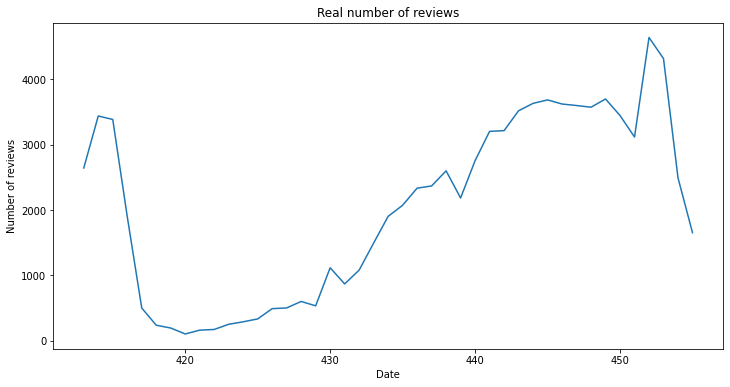

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test)
plt.title("Real number of reviews")
plt.xlabel("Date")
plt.ylabel("Number of reviews")

In [24]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [25]:
clf.fit(x_train, y_train)

/home/x5he/.local/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)